ANIME RATING DATA ANALYSIS

Hi, this is my first python data manupulation and basic machine learning. I am student of BSc. Decsion Science and I do not have any background of Information technology and computer science. 

In [2]:
import pandas as pd

In [3]:
data_import = pd.read_csv("anime.csv")
data_import["episodes"] = data_import["episodes"].replace("Unknown", 0)
len(list(data_import["genre"].unique()))



3265

In [4]:
data_import["episodes"] = data_import["episodes"].fillna(0)
data_import["episodes"].astype(int)

0         1
1        64
2        51
3        24
4        51
         ..
12289     1
12290     1
12291     4
12292     1
12293     1
Name: episodes, Length: 12294, dtype: int32

In [5]:
data_import.dtypes

anime_id      int64
name         object
genre        object
type         object
episodes     object
rating      float64
members       int64
dtype: object

In [6]:
import plotly.express as px
data_import["type"] = data_import["type"].fillna(0)
px.histogram(data_import, x = "rating", color = "type", marginal = "box")

In [7]:
px.pie(data_import, values = "rating", names = "type", title = "Comparison between Anime Type based on Rating")

In summary, most anime has TV shows.

In [15]:
x = data_import["genre"].str.replace(" ","").str.split(',', expand =True)
y = x.apply(x.value_counts, axis = 1) #axis = 1 is same to tranpose
y


,Action,Adventure,Cars,Comedy,Dementia,Demons,Drama,Ecchi,Fantasy,Game,...,ShounenAi,SliceofLife,Space,Sports,SuperPower,Supernatural,Thriller,Vampire,Yaoi,Yuri
0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
1,1.0,1.0,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
4,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12289,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12290,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12291,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12292,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Here, I used string split to separate combined genres in a genre column for each anime. Then, it created a new data table that shows the value of genre for each anime. 

In [9]:
y.melt(var_name = "Genre", value_name ="Value").dropna(1) 
z = y.apply(y.value_counts).dropna() 
z

C:\Users\hpute\AppData\Local\Temp/ipykernel_5244/1743937140.py:1: FutureWarning:

In a future version of pandas all arguments of DataFrame.dropna will be keyword-only



,Action,Adventure,Cars,Comedy,Dementia,Demons,Drama,Ecchi,Fantasy,Game,...,ShounenAi,SliceofLife,Space,Sports,SuperPower,Supernatural,Thriller,Vampire,Yaoi,Yuri
1.0,1194.0,835.0,34.0,1288.0,53.0,188.0,848.0,335.0,814.0,95.0,...,43.0,293.0,174.0,157.0,249.0,603.0,66.0,74.0,21.0,18.0


by using melt and value count, I able to conclude the total of genres.

<AxesSubplot:>

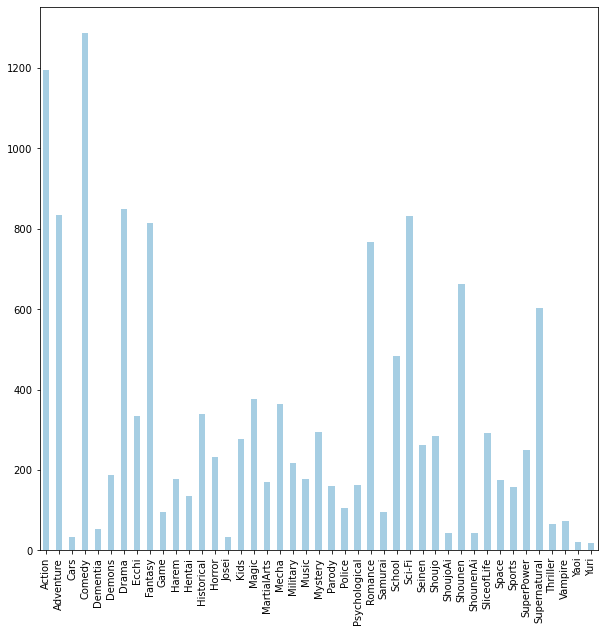

In [10]:
import matplotlib.pyplot as plt

anime_genre = z.T
anime_genre.plot(kind = 'bar', stacked = True, legend = False, colormap = 'Paired', figsize = (10,10))


Here is the bar graph. As we can see, genre comedy anime is the highest followed by action genre. Yaoi and Yuri genre is unpopular anime genre.
Definition: Yaoi - boys loves and Yuri - girls loves